In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
for row in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    print(row)

2017-08-23


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
days365 = dt.date(2017,8,23) - dt.timedelta(days=365)
days365

datetime.date(2016, 8, 23)

In [35]:
# Calculate the date one year from the last date in data set.
last_year = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).all()

In [43]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(last_year, columns=['date','precipitation'])
precipitation_df.set_index('date',inplace=True)

In [44]:
# Sort the dataframe by date
precipitation_df.index = pd.to_datetime(df.index)
precipitation_df.sort_index(ascending=True,inplace=True)
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,0.08
2016-08-23,0.45
2016-08-23,0.00


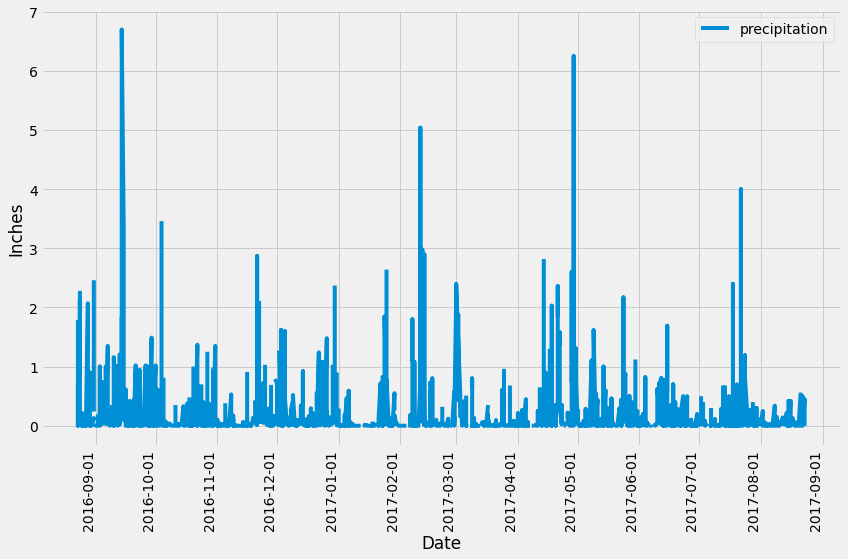

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
# Use Pandas Plotting with Matplotlib to plot the data
ax=df.plot(figsize=(12,8))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation="vertical")
plt.xlabel('Date')
plt.ylabel('Inches')

plt.tight_layout()
plt.savefig("Images/precipitation_data.png")
plt.show()

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Measurement.station).group_by(Measurement.station).count()
stations

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel=[Measurement.station,func.count(Measurement.station)]
top_stations= session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
top_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature=[Measurement.station,
      func.min(Measurement.tobs),
     func.max(Measurement.tobs),
     func.avg(Measurement.tobs)]
top_station_temp = session.query(*temperature).\
    filter(Measurement.station == 'USC00519281').all()
top_station_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [57]:
# Using the most active station id
df_top_station = pd.DataFrame(top_station_temp,columns=['station','min_temp','max_temp','avg_temp'])
df_top_station

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [60]:
sel3=[Measurement.tobs]
active_station_temp = session.query(*sel3).\
    filter(Measurement.date > '2016-08-22',Measurement.station == 'USC00519281').all()

In [61]:
df2=pd.DataFrame(active_station_temp,columns=['tobs'])

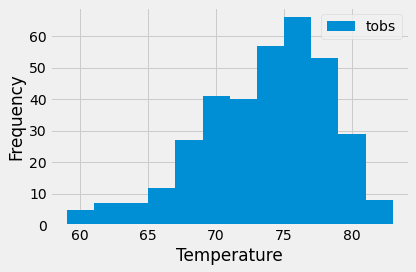

In [63]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df2.plot.hist(bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("Images/station_temp_data.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()